#LAB 3 MODELOS DE MACHINE LEARNING - CLUSTERING

#IMPORTAMOS LAS LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos en matplotlib y seaborn
plt.style.use('seaborn')
sns.set()


<ipython-input-1-4e12d8daab79>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


#CARGAMOS EL DATASET

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lalvarenga90/Dataset-para-AI/main/COVID-19%20Global%20Statistics%20Dataset.csv')
df.head()


,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"


#PREPARAMOS LOS DATOS

In [3]:
# Revisar nombres de columnas y elegir las relevantes
print(df.columns)

# Eliminar comas de los números y convertir a tipo numérico
df = df.replace({',': ''}, regex=True)

selected_columns = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases']
df[selected_columns] = df[selected_columns].apply(pd.to_numeric)

# Seleccionar columnas relevantes para el modelo
df = df[selected_columns]

# Manejo de valores nulos
df = df.dropna()

# Normalización o estandarización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)


Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious, Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population'],
      dtype='object')


#APLICAMOS ALGORITMO DE CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

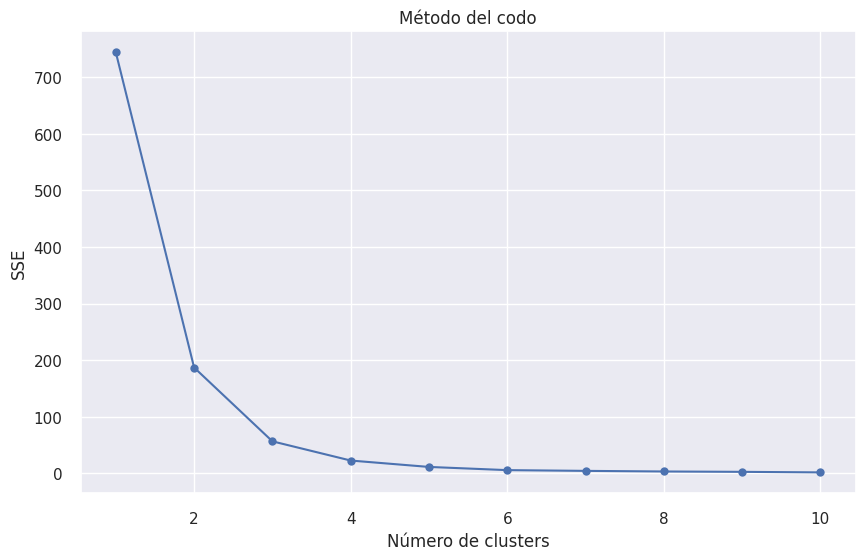

In [4]:
# Método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

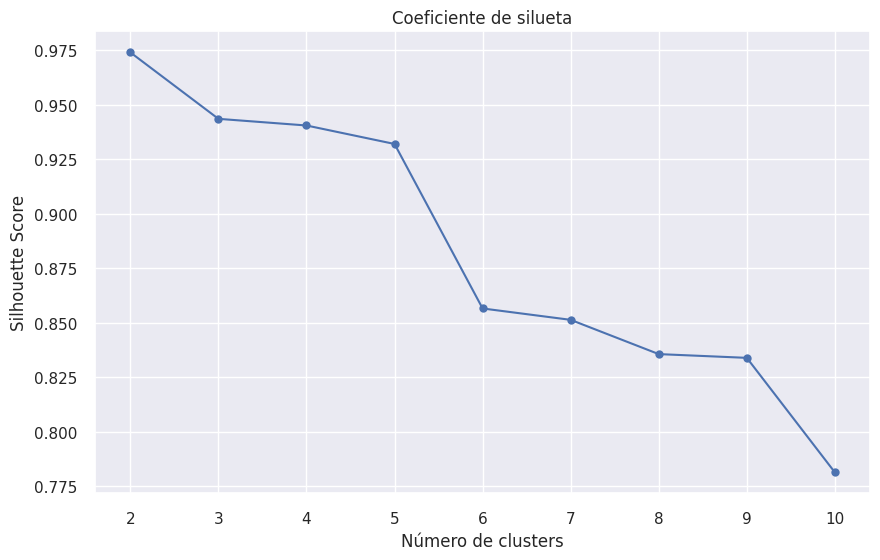

In [5]:
# Coeficiente de silueta
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Coeficiente de silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Añadir los clusters al dataframe original
df['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#VISUALIZAMOS LOS RESULTADOS

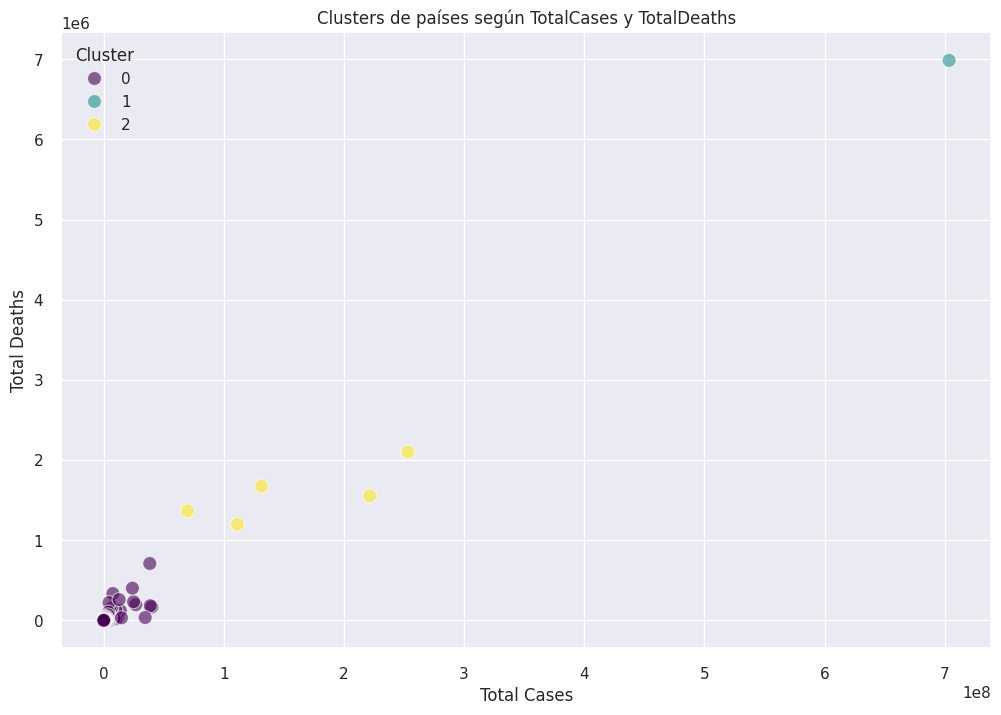

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Total Cases', y='Total Deaths', hue='Cluster', palette='viridis', s=100, alpha=0.6)
plt.title('Clusters de países según TotalCases y TotalDeaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.legend(title='Cluster')
plt.show()


#IMTERPRETAMOS LOS DATOS

In [15]:
# Calcular estadísticas descriptivas para cada cluster
cluster_stats = df.groupby('Cluster').mean()
cluster_stats

,Total Cases,Total Deaths,Total Recovered,Active Cases
Cluster,,,,
0,2.643302e+06,2.696314e+04,2.584604e+06,3.173483e+04
1,7.035311e+08,6.985004e+06,6.743038e+08,2.224229e+07
2,1.574422e+08,1.578494e+06,1.513388e+08,4.524936e+06
